In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [66]:
def line(n):
    line_adj = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if abs(i -j) == 1:
                line_adj[i, j] = 1
    line_deg = np.identity(n)*2
    line_deg[0, 0] = 1
    line_deg[n-1, n-1] = 1
    return line_deg - line_adj

In [68]:
line_lap = line(100)
u, s, v = np.linalg.svd(line_lap)

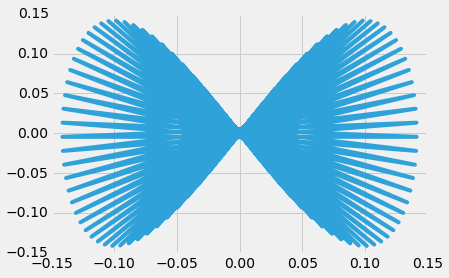

In [69]:
plt.plot(u[:, 0], u[:, 1])

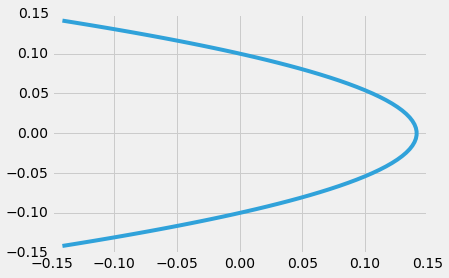

In [70]:
plt.plot(u[:, 97], u[:, 98])

In [100]:
def grid(n):
    grid_adj = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if abs(i - j ) == np.sqrt(n) or abs(i - j) == 1:
                grid_adj[i, j] = 1
    grid_deg = np.diag(np.sum(grid_adj, axis=0))
    return grid_deg - grid_adj

In [106]:
grid_lap = grid(16)
u, s, v = np.linalg.svd(grid_lap)

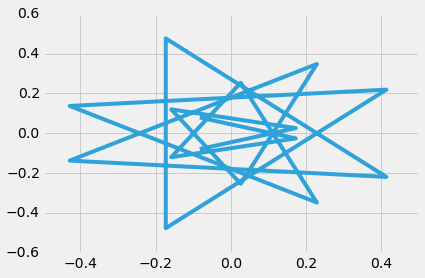

In [107]:
plt.plot(u[:, 0], u[:, 1]);

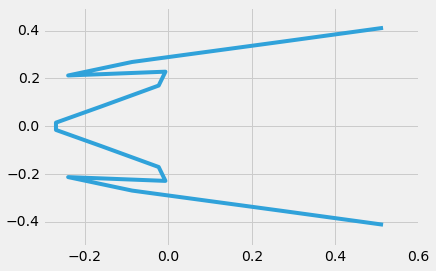

In [109]:
plt.plot(u[:, 13], u[:, 14]);

In [63]:
def circle(n):
    circle_adj = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if abs(i - j ) == 1 or (i == 0 and j == n - 1) or (i == n - 1 and j ==0):
                circle_adj[i, j] = 1
    circle_deg = np.diag(np.sum(circle_adj, axis=0))
    return circle_deg - circle_adj

In [64]:
circle_lap = circle(100)
u, s, v = np.linalg.svd(circle_lap)

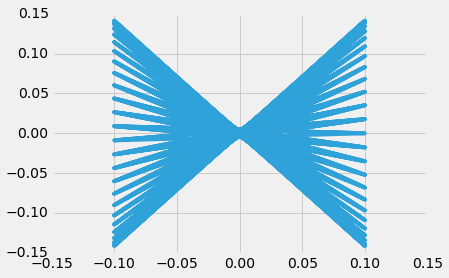

In [65]:
plt.plot(u[:, 0], u[:, 1])

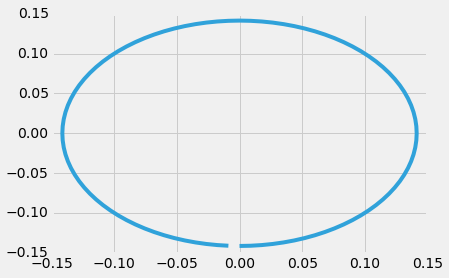

In [60]:
plt.plot(u[:, 97], u[:, 98])

In [73]:
def dist(p1, p2):
    return np.sqrt(sum((p1 - p2)**2))

In [71]:
def rand(n):
    points = [np.random.uniform(size=2) for _ in range(n)]
    rand_adj = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if dist(points[i], points[j]) < 0.25:
                rand_adj[i, j] = 1
    rand_deg = np.diag(np.sum(rand_adj, axis=0))
    return rand_deg - rand_adj

In [74]:
rand_lap = rand(100)
u, s, v = np.linalg.svd(rand_lap)

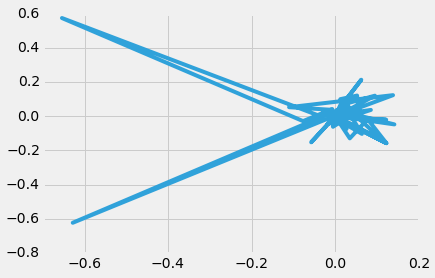

In [75]:
plt.plot(u[:, 0], u[:, 1])

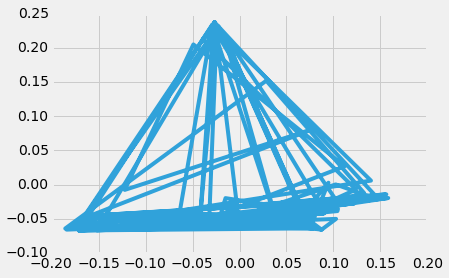

In [77]:
plt.plot(u[:, 97], u[:, 98])

A small subset of Facebook friend graph data from the Stanford Network Analysis Project.

In [2]:
data = np.loadtxt("cs168mp6.csv", delimiter=",")
data.shape

(61796L, 2L)

Construct the adjacency graph based on the CSV data.

In [3]:
friends = np.zeros((1495, 1495))
for i in range(data.shape[0]):
    row = data[i , :]
    friends[int(row[0] - 1), int(row[1] - 1)] = 1

Construct the degree matrix and the Laplacian.

In [4]:
friends_deg = np.diag(np.sum(friends, axis=0))
friends_lap = np.diag(friends_deg) - friends

Perform singular value decomposition on the Laplacian.

In [5]:
U, S, V = np.linalg.svd(friends_lap)

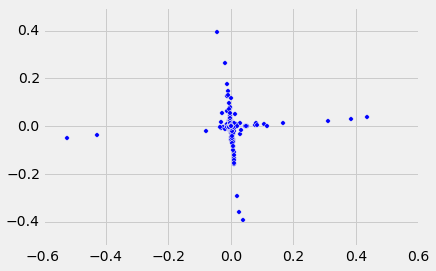

In [132]:
plt.scatter(U[:, 1274], U[:, 1275]);

Conductance of a set of nodes in a graph is a measure of how tightly knit the set is with a lower conductance indicating a more tightly knit set. The numerator is the number of edges connecting the set of nodes S to nodes outside the set S in the overall graph. The denominator is the minimum of the sum of the degrees within S and the sum of the degrees outside S in the graph. If the conductance is 0 the set S is disconnected from the rest of the graph and is the conductance is 1 there are no internal edges within the set S. 

In [ ]:
def conductance(S, friends_adj, friends_deg):
    deg_array = np.diag(friends_deg)
    A_S = sum(deg_array[S])
    nodes_outside = list(set(np.arange(len(friends_deg))) - set(S))
    A_VS = sum(deg_array[nodes_outside])
    numerator = 0.0
    for i in S:
        for j in nodes_outside:
            numerator += friends_adj[i, j]
    denominator = min(A_S, A_VS)
    return numerator / denominator

When a random set of size 150 nodes is selected from the graph the conductance is typically around 0.9.

In [75]:
for i in range(1, 20, 1):
    rando = np.random.randint(low=0, high=len(friends_deg), size=150)
    rcond = conductance(rando, friends, friends_deg)
    print "Trial %d: Conductance: %0.4f" %(i, rcond)

Trial 1: Conductance: 0.9066
Trial 2: Conductance: 0.8969
Trial 3: Conductance: 0.8934
Trial 4: Conductance: 0.9055
Trial 5: Conductance: 0.9073
Trial 6: Conductance: 0.9113
Trial 7: Conductance: 0.9161
Trial 8: Conductance: 0.8984
Trial 9: Conductance: 0.9159
Trial 10: Conductance: 0.8976
Trial 11: Conductance: 0.9155
Trial 12: Conductance: 0.8921
Trial 13: Conductance: 0.9175
Trial 14: Conductance: 0.9139
Trial 15: Conductance: 0.8950
Trial 16: Conductance: 0.9154
Trial 17: Conductance: 0.8927
Trial 18: Conductance: 0.9108
Trial 19: Conductance: 0.8977


In [113]:
close_indices = []
for i in range(len(friends)):
    if U[i, 1275] > 0.00055:
        close_indices.append(i)
cond = conductance(close_indices, friends, friends_deg)
print len(close_indices)
print cond

639
0.119829656141
